# <center>  Függvények tanulása differenciálegyenletek megoldásával </center>



<b>Általános megközelítés</b>

+ Bemeneti vektor: $x_i\in\mathbb{R}^n$, $i=1,\ldots,N$
+ Kimeneti vektor: $y_i\in\mathbb{R}^m$, $i=1,\ldots,N$
+ $f:\mathbb{R}^n\times \mathbb{R}^k \to \mathbb{R}^m$ egy $k$-paraméteres függvénycsalád

<br>
<br>
Olyan $\Theta\in \mathbb{R}^k$ paraméter vektort keresünk, amire az $|f(x_i,\Theta)-y_i|$ eltérések valamilyen függvénye minimális
<br><br><br>
Például négyzetes összeget véve:
$$
L(\Theta)= \sum_{i=1}^N |f(x_i,\Theta)-y_i|^2
$$


Ez annyira általános, hogy számos ismert approximációt magába foglal. Pédául:

+ <i>Lineáris regresszió</i>

<center>$$f(x,\Theta)=Ax+b$$</center>

+ <i>Polinomillesztés</i> 

<center>$$f(x,\Theta)=\Theta_0+ \Theta_1 x + \ldots + \Theta_k x^k$$</center>

+ <i>Fourier sorfejtés</i> 

<center>$$f(x,\Theta)=\Theta_0+ \Theta_1 \cos(x) + \ldots + \Theta_k \cos(kx)$$</center>

+ <i>Neurális háló</i> 

<center>$f(x,\Theta)$ a $\Theta$ paraméterű $\sigma(Ax+b)$ kompozíciói </center>

Az $f$ függvénycsaládnak két fontos feltételt kell teljesítenie:


+ A bemenet-kimenet adatokból hatékonyan meg lehessen határozni a $\Theta\in \mathbb{R}^k$ paraméter vektort
<br><br>
+ A megadott bemenet-kimenet adatokon kívüliekre is jól kell hogyy működjön a $\Theta\in \mathbb{R}^k$ paraméter vektor

<b>Tanulás differenciálegyenletekkel: trajektória megközelítés</b>
    
Motiváló példa: a szabadesés modellje


+ Bemenet (idő értékek): $x_0=0$, $x_1=1, \ldots , x_k=k$ 

+ Kimenet (test helyzete): $y_0=0$, $y_1=5, \ldots , y_k=5k^2$
<br>

<center><b><i>Polinomcsaláddal is leírható az adat, de mi mégis differenciálegyenlettel akarunk modellezni</i></b></center>
    

<b>Általános feladat</b>


Adottak a

$$g:[0,T] \to \mathbb{R}\ \mathrm{és}\ h: \mathbb{R}^n \to \mathbb{R}$$

függvények. Keresendő

<center>$f:\mathbb{R}^n\times\mathbb{R}^k\rightarrow\mathbb{R}^n$ és  $\Theta : \mathbb{R} \to \mathbb{R}^k$ </center>

úgy, hogy a 

$$
\dot z(t) = f(z(t),\Theta(t))
$$

differenciálegyenlet megoldására teljesüljön  $$h(z(t))=g(t)\ \mathrm{minden}\ t\in [0,T] \ \mathrm{esetén}$$

<i>Veszteségfüggvény</i> $$L(\Theta)=\|h\circ z -g\|$$

<b>A szabadesés modellje</b>

+ $g(t)=t^2$ 
+ $n=2$
+ $h(z_1,z_2)=z_1$
+ A függvénycsalád
$$
f(z,\Theta(t))
=
\begin{pmatrix}
\Theta_1(t) & \Theta_2(t)\\
\Theta_3(t) & \Theta_4(t)
\end{pmatrix}\begin{pmatrix}
z_1\\
z_2
\end{pmatrix}+ \begin{pmatrix}
\Theta_5(t) \\
\Theta_6(t)
\end{pmatrix}
$$



<br><br>

<i>Egy megoldás:</i> $\Theta_1(t)=0$, $\Theta_2(t)=1$, $\Theta_3(t)=\Theta_4(t)=\Theta_5(t)=0$ és $\Theta_6(t)=2$



<b>A tanulási folyamat legfőbb lépései:</b>

+ Időbeli alappontok megválasztás

+ Kezdetiérték vektor definiálása  

+ Adjungált érzékenységi módszer használata

+ A megoldás megszorítása

+ Eredmények összehasonlítása




In [1]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Az adjungált érzékenység módszer: https://arxiv.org/abs/1806.07366
from torchdiffeq import odeint_adjoint as odeint 


In [2]:
## Batch definíciója
def get_batch():
    ixs = torch.from_numpy(
        np.array(sorted(np.random.choice(data_size, batch_size, replace=False)), dtype=int)
    )
    return true_y0, t[ixs], true_y[ixs]

## x' = Ax + b alakhoz a lin.háló
class AutonomousLinear(nn.Linear): 
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def forward(self, _, x):
        return super().forward(x)

## Kiterjesztés
def up(x): return torch.ones(1, 2)*x
## Leszűkítés: n=2; h(z_1, z_2) = z_1 
def down(x): return x[..., 0].reshape((-1,)) 

## Kiterjesztés, leszűkítés és adjungált érzékenység módszere
def odeint_up_down(func, y0, ts):
    return down(odeint(func, up(y0), ts))

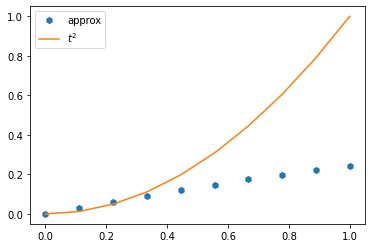

Iter 0100 | Total Loss 0.229110


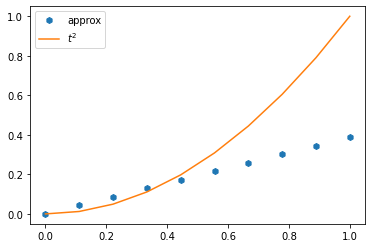

Iter 0200 | Total Loss 0.174947


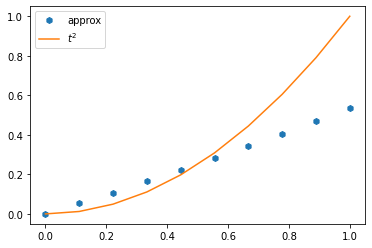

Iter 0300 | Total Loss 0.128275


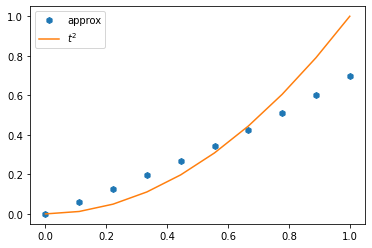

Iter 0400 | Total Loss 0.091756


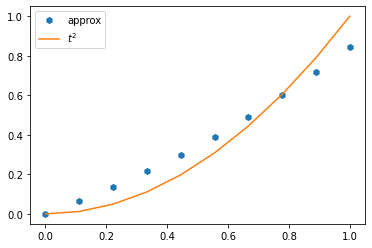

Iter 0500 | Total Loss 0.070959


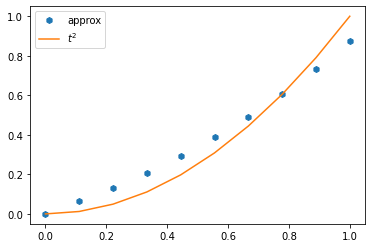

Iter 0600 | Total Loss 0.063796


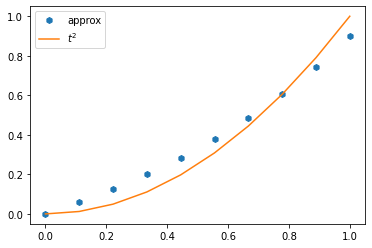

Iter 0700 | Total Loss 0.055751


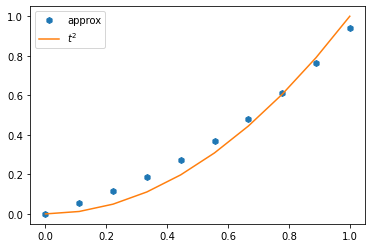

Iter 0800 | Total Loss 0.045280


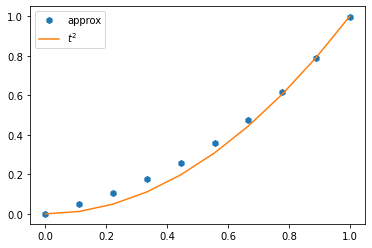

Iter 0900 | Total Loss 0.031921


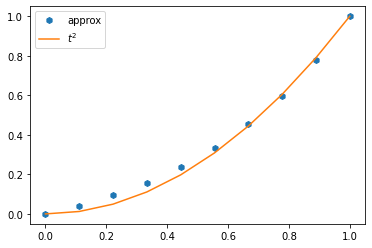

Iter 1000 | Total Loss 0.021152
A:
Parameter containing:
tensor([[ 0.5911, -1.0191],
        [-0.4944,  1.4610]], requires_grad=True)
b:
Parameter containing:
tensor([ 0.3419, -0.4287], requires_grad=True)


In [4]:
if __name__ == '__main__':
    data_size, batch_size = 10, 10
    niters = 1000
    test_freq = 100

    t = torch.linspace(0., 1., data_size)
    true_y = t**2
    true_y0 = true_y[0]

    ## x' = Ax + b alak: speciális alak az f(t,x) differenciálegyenlet jobboldalára
    func = AutonomousLinear(2, 2, bias=True)
    ## Adam optimalizáló a szokásos első és második momumentum paraméterekkel (betas); tanulási rátával (lr)
    optimizer = optim.Adam(func.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
   
    for itr in range(1, niters + 1):
        optimizer.zero_grad()
        batch_y0, batch_t, batch_y = get_batch()
        pred_y = odeint_up_down(func, up(batch_y0), batch_t)
        loss = torch.mean(torch.abs(pred_y - batch_y)**1)
        loss.backward()
        optimizer.step()

        if itr % test_freq == 0:
            with torch.no_grad():
                pred_y = odeint_up_down(func, true_y0, t)
                plt.plot(t, pred_y, 'h')
                plt.plot(t, true_y, '-')
                plt.legend(['approx', '$t^2$'])
                plt.show()
                loss = torch.mean(torch.abs(pred_y - true_y))
                print('Iter {:04d} | Total Loss {:.6f}'.format(itr, loss.item()))

        end = time.time()

    with torch.no_grad():
        A = func.parameters().__next__()
        b = func.bias
        print('A:', A, 'b:', b, sep='\n')



Text(0, 0.5, 'Veszteségfüggvény értéke')

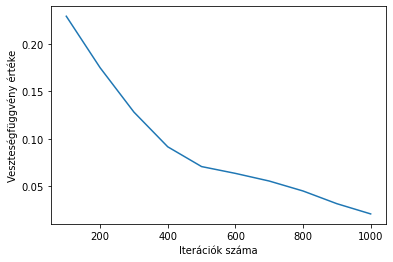

In [18]:
plt.plot([100*x+100 for x in range(10)], [0.229110, 0.174947, 0.128275, 0.091756, 0.070959, 0.063796, 0.055751, 0.045280, 0.031921, 0.021152 ])
plt.xlabel('Iterációk száma')
plt.ylabel('Veszteségfüggvény értéke')

Text(0, 0.5, 'Veszteségfüggvény értéke')

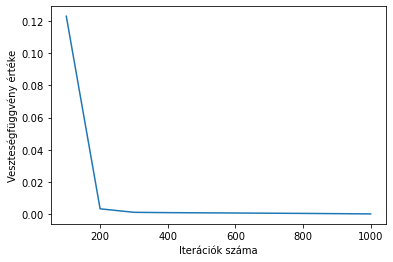

In [19]:
plt.plot([100*x+100 for x in range(10)], [0.122737, 0.003467, 0.001305, 0.001102, 0.000983, 0.000881, 0.000749, 0.000627, 0.000475, 0.000312])
plt.xlabel('Iterációk száma')
plt.ylabel('Veszteségfüggvény értéke')

<b>Harmonikus rezgőmozgás</b>

+ $g(t)=\cos(t)$ 
+ $n=2$
+ $h(z_1,z_2)=z_1$
+ A függvénycsalád
$$
f(z,\Theta(t))
=
\begin{pmatrix}
\Theta_1(t) & \Theta_2(t)\\
\Theta_3(t) & \Theta_4(t)
\end{pmatrix}\begin{pmatrix}
z_1\\
z_2
\end{pmatrix}
$$



<br><br>

<i>Egy megoldás:</i> $\Theta_1(t)=0$, $\Theta_2(t)=-1$, $\Theta_3(t)=1$ és $\Theta_4(t)=0$ 




<br>
<center>
<table><tr>
<td> <img src="100cos.png" style="height: 300px;"/> <center>100 iteráció után</center></td>
<td> <img src="1000cos.png"  style="height: 300px;"/> <center>1000 iteráció után</center></td>
</tr></table>
</center>

In [ ]:
tensor([[ 4.1421e-01, -9.7422e-01],
        [ 1.9673e+00,  1.6012e-03]])

Iter 0100 | Total Loss 0.292533
Iter 0200 | Total Loss 0.133004
Iter 0300 | Total Loss 0.009141
Iter 0400 | Total Loss 0.006634
Iter 0500 | Total Loss 0.004124
Iter 0600 | Total Loss 0.001867
Iter 0700 | Total Loss 0.001300
Iter 0800 | Total Loss 0.001246
Iter 0900 | Total Loss 0.001240
Iter 1000 | Total Loss 0.001234

A:
tensor([[ 0.6624,  1.6100],
        [-0.6838, -0.3641]], requires_grad=True)

Text(0, 0.5, 'Veszteségfüggvény értéke')

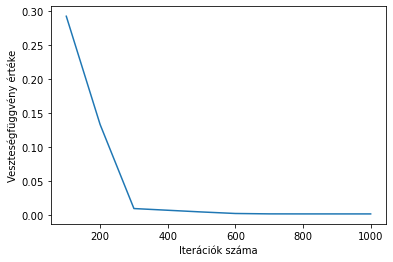

In [20]:
plt.plot([100*x+100 for x in range(10)], [0.292533, 0.133004, 0.009141, 0.006634, 0.004124, 0.001867, 0.001300, 0.001246, 0.001240, 0.001234 ])
plt.xlabel('Iterációk száma')
plt.ylabel('Veszteségfüggvény értéke')

<b>Hátralévő feladatok:</b>

+ Hiperparaméterek beállítása
<br><br>
+ Az adjungált érzékenységi módszerhez tartozó megoldó gyorsítása
    + odeint_up_down(func, up(batch_y0), batch_t)

<br><br>

## <center>Köszönöm a figyelmet!</center>

